# Project 4 - Group 19

## Part 1 - Selection

### 1.1 Which dataset did we choose and why did this data appeal to us?

We chose the 'Fire Department Calls for Service' dataset provided by the DataSF(https://data.sfgov.org/Public-Safety/Fire-Department-Calls-for-Service/nuek-vuh3), where we extracted the recent two years of data from 2016 to 2017. 

The data has records of all the emergency calls made in San Francisco, regarding the following information:

- All the list of calls identified by its call numbers and the Incident Number given by the Fire department.
- When the call was made, the time the call was entered into the fire department call system as an individual incident, how long it took for the Fire department to dispatch a relevant unit, arrive on scene, sent to the hospital if necessary, and finally complete taking care of the incident and became available again to engage in a new incident
- The address of the call made, and which battalion, station area, box and other units or districts such incident occurred. 
- What kind of incident it was, and what team/unit of the fire department engaged in solving the crisis
- How urgent the incident was

The first question that came into mind when we saw the dataset was "How fast does it take for the Fire Department to respond to the calls?". In regards, this dataset was appealing because we obviously know that fast response is crucial for Fire Departments, but we further wanted to analyze if the average response time differs according to the conditions of the incident and the response unit type, and if that's so, if we could find any inefficiencies in the response time to suggest to the Fire Department.

### 1.2 Questions and Themes Raised from Initial Analysis

The <b>goal</b> of our project is very clear. 
- We want to understand the characteristics of the Fire Department Calls in San Francisco. 
- We also want to analyze the average time response of the Fire Department in regards to different variables to see if there are any inefficiencies with the response system. 


    
From the initial analysis, we came up with four themes to analyze the dataset and the some related questions. 

##### Theme 1: Time/Date of the Incident
- Which hour during the day has greatest number of incidents?
- Which hour of the day has the shortest/longest average time duration of an incident? 
- Does the time of the incident have relations to the type of the incident?

##### Theme 2: Location of the Incident
- Which neighborhood has most count for certain type of incident?
- Which neighborhood has the least average time duration?

##### Theme 3: Incident Types
- What are the frequencies of each call type of incident?
- How does the average time duration differ among the call type?
- Regarding each call types, which unit is the most efficient?

##### Theme 4: Urgency and Priority of the Incident
- Which unit with priority for emergent incidents (code as 2) has the greatest efficiency and the least efficiency?
- Since the original priority is related to type of the incident, the count of priority changes on each call type can suggest if the department need to change the pre-defined priority criteria for some call type. What are they?


#### Bonus Part Data

We chose the 'Fire Department Incident Count' of Las Vegas provided by Open Data(https://opendata.lasvegasnevada.gov/Community-Risk-Reduction/Fire-Department-Incident-Count/nc8s-phaf) to perform additional analysis with our current dataset. 

We tried to find a dataset regarding the Fire Department call incidents from a different city with similar variables to use them as a comparison, and found this one from Las Vegas. We plan to perform a similar analysis with the bonus dataset to compare if there are any distinct patterns or behaviors that are different among San Francisco and Las Vegas. 

### 1.3 Project Workflow

STEP 1: Select original dataset from opendata.gov </br>
STEP 2: Basic analysis on original dataset by Spark </br>
STEP 3: Data wrangling and cleaning by Trifecta </br>
STEP 4: Build Star schema by Google Drawing </br>
STEP 5: Basic analysis on cleaned dataset by Pipeline CSVkit </br>
STEP 6: Coding and exploring on reserach questions by SQL </br>
STEP 7: Visualizaions by Tableau Desktop </br>
STEP 8: Coding and exploring on bonuns questions by SQL

### 1.4 Concerns and Expected Challenges

* We have no standards to define efficiency to each unit in the fire department. While it costs lots of social resources to achieve fast arrivals for the police, and since some non-emergency incidents do not need quick arrivals, we cannot simply define efficiency as shortest time used for arrivals. However, as an ordinary people calling and reporting the incidents, one would always expect the police to come as soon as possible, no matter which emergent level the incident is. Thus, we mainly analysize and explore on the average of time duration it takes under different conditions, although this question remains as a concern.
* Our second concerns is about the bias of efficiency due to distances from police station to the scene. Because there may be some emergent incidents like mountain fires that happens far away from the police station. The distances cause long time duration, but not ineffiency. Yet, our dataset is lack of data on distances. Luckily, there are few records on fires, and we may ignore the bias.
* We also face to a challenge that the time duration is the only numeric fact we have from the dataset, so that most of our research questions are related with average of time duration. So we're challenged to make a comprehensive research based on one numeric fact.

## Part 2 - Data Wrangling

### 2.1 Initial Analysis on the original dataset

In [2]:
!wget https://s3.amazonaws.com/xueluzhang-istm-practice08/2016_2017.csv

--2018-12-10 02:48:19--  https://s3.amazonaws.com/xueluzhang-istm-practice08/2016_2017.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.102.5
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.102.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242214093 (231M) [text/csv]
Saving to: ‘2016_2017.csv’

2016_2017.csv       100%[===================>] 230.99M  45.0MB/s    in 5.1s    

2018-12-10 02:48:25 (45.0 MB/s) - ‘2016_2017.csv’ saved [242214093/242214093]



In [3]:
import findspark

In [4]:
findspark.init()

In [5]:
from pyspark import SparkContext

In [6]:
spark = SparkContext(appName='week-9')

In [7]:
spark

<SparkContext master=local[*] appName=week-9>

In [8]:
from pyspark import SQLContext

In [9]:
sqlc = SQLContext(spark)

In [10]:
sqlc

In [11]:
fire_depart = sqlc.read.csv("2016_2017.csv", header=True, inferSchema=True)

In [12]:
fire_depart.count()

616438

In [13]:
fire_depart.columns

['Call Number',
 'Unit ID',
 'Incident Number',
 'Call Type',
 'Call Date',
 'Watch Date',
 'Received DtTm',
 'Entry DtTm',
 'Dispatch DtTm',
 'Response DtTm',
 'On Scene DtTm',
 'Transport DtTm',
 'Hospital DtTm',
 'Call Final Disposition',
 'Available DtTm',
 'Address',
 'City',
 'Zipcode of Incident',
 'Battalion',
 'Station Area',
 'Box',
 'Original Priority',
 'Priority',
 'Final Priority',
 'ALS Unit',
 'Call Type Group',
 'Number of Alarms',
 'Unit Type',
 'Unit sequence in call dispatch',
 'Fire Prevention District',
 'Supervisor District',
 'Neighborhooods - Analysis Boundaries',
 'Location',
 'RowID']

In [14]:
fire_depart.printSchema()

root
 |-- Call Number: integer (nullable = true)
 |-- Unit ID: string (nullable = true)
 |-- Incident Number: integer (nullable = true)
 |-- Call Type: string (nullable = true)
 |-- Call Date: string (nullable = true)
 |-- Watch Date: string (nullable = true)
 |-- Received DtTm: string (nullable = true)
 |-- Entry DtTm: string (nullable = true)
 |-- Dispatch DtTm: string (nullable = true)
 |-- Response DtTm: string (nullable = true)
 |-- On Scene DtTm: string (nullable = true)
 |-- Transport DtTm: string (nullable = true)
 |-- Hospital DtTm: string (nullable = true)
 |-- Call Final Disposition: string (nullable = true)
 |-- Available DtTm: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Zipcode of Incident: integer (nullable = true)
 |-- Battalion: string (nullable = true)
 |-- Station Area: integer (nullable = true)
 |-- Box: string (nullable = true)
 |-- Original Priority: string (nullable = true)
 |-- Priority: string (nullabl

In [15]:
len(fire_depart.columns)

34

The origianl dataset of 'SF Emergency Calls' has 616438 records and 34 columns. Some columns seem irrelevant to our analysis topic and need to be removed. Beyond that, the missing values in all columns should also be wrangled. Overall, the original dataset is not relatively clean. And the data issues should be solved.

### 2.2 Clean up the dataset with Trifacta

<b>Question</b>: Be specific about any key decisions to modify or remove data, how you overcame any challenges, and all assumptions you make about the meaning of variables and their values

<b>Challenge</b>: There are 34 columns in the original dataset. Some of them are not necessary and we are not sure about the meaning of some non-public values. Addtionally, for further analysis, we need the detailed data from the columns, like the month, year and hour from the full date. So we need to transform the raw data of date to structured format, split them or extract them.

In this part, we used the Trifacta to clean up our dataset. Due to its visualization, Trifacta is a much easier tool to clean up the raw data. Beyond that, its visulization on the raw data could contribute to our decision of removing data. With the use of trifacta, we removed some irrelevant columns and columns of many missing values. 
- Call Number contains only record for the fire department, this will be the same as incident number. - Call Date is unnecessary as Received DtTm contains more detailed date and time data. 
- Watch Date, Entry DtTm, Dispatch DtTm, Response DtTm, Transport DtTm, Hospital DtTm, Available DtTm, ALS Unit, and Unit sequence in call dispatch are unnecessary for our analysis. 
- Most of the record of Number of Alarms are "1", therefore, it is unnecessary to do further analysis on it. 
- Priority does not contain a clear information, and it is unnecessary for our analysis. 
- Box, Fire Prevention District and Supervisor District are not clear and may not be publicly disclosed. 
- RowID, we assume it is the same as incident number and unit key, therefore, we decide to drop it. 
- For On Scene DtTm, we decide to consider the whole police officers as a whole, we only need to use the time duration for on-scene and call received time. 
- We manually renamed a few variables for convenience: Received DtTm, On Scene DtTm, Unit ID, Incident Number, Call Type, Zipcode of Incident, Received_DtTm1, Received_DtTm3, Received_DtTm3_Hour, month_Received_DtTm1_Date, Station Area, Original Priority, and Final Priority. 
- Manually deleted the missing value on On Scene DtTm, Received DtTm, Zipcode of Incident, Original Priority, Call Type Group, and Station Area. 
- Drop the columns of Onscene_DtTm_Month, Onscene_DtTm_Hour action, Received_DtTm4 actionan d Received_DtTm5 action as they are unnecessary for our analysis. 
- Move the column Onscene_DtTm_Hour after Onscene_DtTm_Month. 
- Copy Received_DtTm, Onscene_DtTm, and split it. 
- Move the position of Received_DtTm_Full, Received_DtTm, Onscene_DtTm_Full, Onscene_DtTm. 
- Derive the type of YEAR, MONTH, HOUR, and DATEDIF. 
- Change the type of Original Priority and Final Priority from Text to Numeric. 


It is much easier to split the columns and extract values via Trifacta. For further analysis, we calculated the time duration between the received_datetime and on_scene datetime as the fact element. Additionally,we also extracted the year, month and hour from the full received date.

The text of our recipe is shown below.  

```
drop col: {Call Number} action: Drop
drop col: {Call Date} action: Drop
drop col: {Watch Date} action: Drop
drop col: {Entry DtTm} action: Drop
drop col: {Dispatch DtTm} action: Drop
drop col: {Response DtTm} action: Drop
drop col: {Transport DtTm} action: Drop
drop col: {Hospital DtTm} action: Drop
drop col: {Available DtTm} action: Drop
drop col: City action: Drop
drop col: Box action: Drop
drop col: Battalion action: Drop
drop col: Priority action: Drop
drop col: {ALS Unit} action: Drop
drop col: {Number of Alarms} action: Drop
drop col: {Unit sequence in call dispatch} action: Drop
drop col: {Fire Prevention District} action: Drop
drop col: {Supervisor District} action: Drop
drop col: RowID action: Drop
filter type: custom rowType: single row: ISMISSING([{On Scene DtTm}]) action: Delete
filter type: custom rowType: single row: ISMISMATCHED({On Scene DtTm}, ['Datetime','mm-dd-yy hh:mm:ss','mm*dd*yyyy*HH:MM:SS']) action: Delete
filter type: custom rowType: single row: ISMISMATCHED({Received DtTm}, ['Datetime','mm-dd-yy hh:mm:ss','mm*dd*yyyy*HH:MM:SS']) action: Delete
filter type: custom rowType: single row: ISMISSING([{Zipcode of Incident}]) action: Delete
filter type: custom rowType: single row: ISMISMATCHED({Original Priority}, ['Integer']) action: Delete
filter type: custom rowType: single row: ISMISSING([{Call Type Group}]) action: Delete
rename type: manual mapping: [{Received DtTm},'Received_DtTm']
rename type: manual mapping: [{On Scene DtTm},'onScene_DtTm']
rename type: manual mapping: [onScene_DtTm,'Onscene_DtTm']
rename type: manual mapping: [{Unit ID},'Unit_ID']
rename type: manual mapping: [{Incident Number},'Incident_Number']
rename type: manual mapping: [{Call Type},'Call_Type']
drop col: {Call Final Disposition} action: Drop
rename type: manual mapping: [{Zipcode of Incident},'Zipcode']
filter type: custom rowType: single row: ISMISSING([{Station Area}]) action: Delete
derive type: single value: Received_DtTm as: 'Received_DtTm_Full'
derive type: single value: Onscene_DtTm as: 'Onscene_DtTm_Full'
move col: Received_DtTm_Full,Received_DtTm position: before before: Received_DtTm_Full
move col: Onscene_DtTm_Full,Onscene_DtTm position: before before: Onscene_DtTm_Full
splitpatterns col: Received_DtTm type: on on: ' '
splitpatterns col: Received_DtTm2 type: multiple delimiters: ':',':'
rename type: manual mapping: [Received_DtTm1,'Received_DtTm1_Date']
rename type: manual mapping: [Received_DtTm3,'Received_DtTm3_Hour']
drop col: Received_DtTm4 action: Drop
drop col: Received_DtTm5 action: Drop
rename type: manual mapping: [Received_DtTm3_Hour,'Received_DtTm_Hour']
derive type: single value: MONTH(Received_DtTm1_Date) as: 'month_Received_DtTm1_Date'
drop col: Received_DtTm1_Date action: Drop
rename type: manual mapping: [month_Received_DtTm1_Date,'Received_DtTm_Month']
derive type: single value: MONTH(Onscene_DtTm) as: 'Onscene_DtTm_Month'
derive type: single value: HOUR(Onscene_DtTm) as: 'Onscene_DtTm_Hour'
move col: Onscene_DtTm_Hour position: after after: Onscene_DtTm_Month
drop col: Onscene_DtTm action: Drop
rename type: manual mapping: [{Station Area},'Station_Area']
rename type: manual mapping: [{Original Priority},'Original_Priority']
rename type: manual mapping: [{Final Priority},'Final_Priority']
derive type: single value: YEAR(Received_DtTm_Full) as: 'Received_DtTm_Year'
drop col: Onscene_DtTm_Month action: Drop
drop col: Onscene_DtTm_Hour action: Drop
derive type: single value: DATEDIF(Received_DtTm_Full, Onscene_DtTm_Full, second) as: 'Time_duration'

```

In [17]:
!wget https://s3.amazonaws.com/xueluzhang-istm-practice08/dataV2.csv

--2018-12-10 02:52:16--  https://s3.amazonaws.com/xueluzhang-istm-practice08/dataV2.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.163.141
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.163.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90529524 (86M) [text/csv]
Saving to: ‘dataV2.csv.1’

dataV2.csv.1        100%[===================>]  86.33M  55.4MB/s    in 1.6s    

2018-12-10 02:52:18 (55.4 MB/s) - ‘dataV2.csv.1’ saved [90529524/90529524]



<b>BONUS DATASET WRANGLING</b> </br>
With the use of trifacta, we removed some irrelevant columns and columns with too many missing values for the comparison anlysis. The columns like division_name, station_action, radio_name, ward action, first unit assgined action, are not irrelevant for the further analysis and are removed. Beyond that, we also extract the year, hour, month from the column of response date.</br> 
The following is the wrangling recipe for Las_Vegas.csv, which is our bonus dataset.
```
drop col: Division_Name action: Drop
drop col: Station action: Drop
drop col: Radio_Name action: Drop
drop col: First_Unit_Assigned action: Drop
drop col: First_Unit_Arrived action: Drop
drop col: Assign_Time action: Drop
drop col: Ward action: Drop
drop col: Location action: Drop
drop col: {Location 1} action: Drop
drop col: {Fiscal Year} action: Drop
drop col: {Per Capita} action: Drop
filter type: custom rowType: single row: ISMISMATCHED(Arrive_Time, ['Datetime','mm-dd-yy hh:mm:ss','mm*dd*yyyy*HH:MM']) action: Delete
filter type: custom rowType: single row: ISMISMATCHED(Response_Date, ['Datetime','mm-dd-yy hh:mm:ss','mm*dd*yyyy*HH:MM']) action: Delete
drop col: Jurisdiction action: Drop
derive type: single value: DATEDIF(Response_Date, Arrive_Time, second) as: 'time_duration'
derive type: single value: YEAR(Response_Date) as: 'Year'
derive type: single value: MONTH(Response_Date) as: 'Month'
derive type: single value: HOUR(Response_Date) as: 'Hour'
```

In [18]:
!wget https://s3.amazonaws.com/yoonacha-dmfa/Las_Vegas.csv

--2018-12-10 02:52:34--  https://s3.amazonaws.com/yoonacha-dmfa/Las_Vegas.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.16.27
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.16.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8735721 (8.3M) [text/csv]
Saving to: ‘Las_Vegas.csv’

Las_Vegas.csv       100%[===================>]   8.33M  24.2MB/s    in 0.3s    

2018-12-10 02:52:34 (24.2 MB/s) - ‘Las_Vegas.csv’ saved [8735721/8735721]



### 2.3 Modeling

In [13]:
!wget https://s3.amazonaws.com/xueluzhang-istm-proj4/group_schema.jpg

--2018-12-10 17:35:14--  https://s3.amazonaws.com/xueluzhang-istm-proj4/group_schema.jpg
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.114.172
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.114.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78916 (77K) [image/jpeg]
Saving to: ‘group_schema.jpg’

group_schema.jpg    100%[===================>]  77.07K  --.-KB/s    in 0.001s  

2018-12-10 17:35:14 (73.9 MB/s) - ‘group_schema.jpg’ saved [78916/78916]



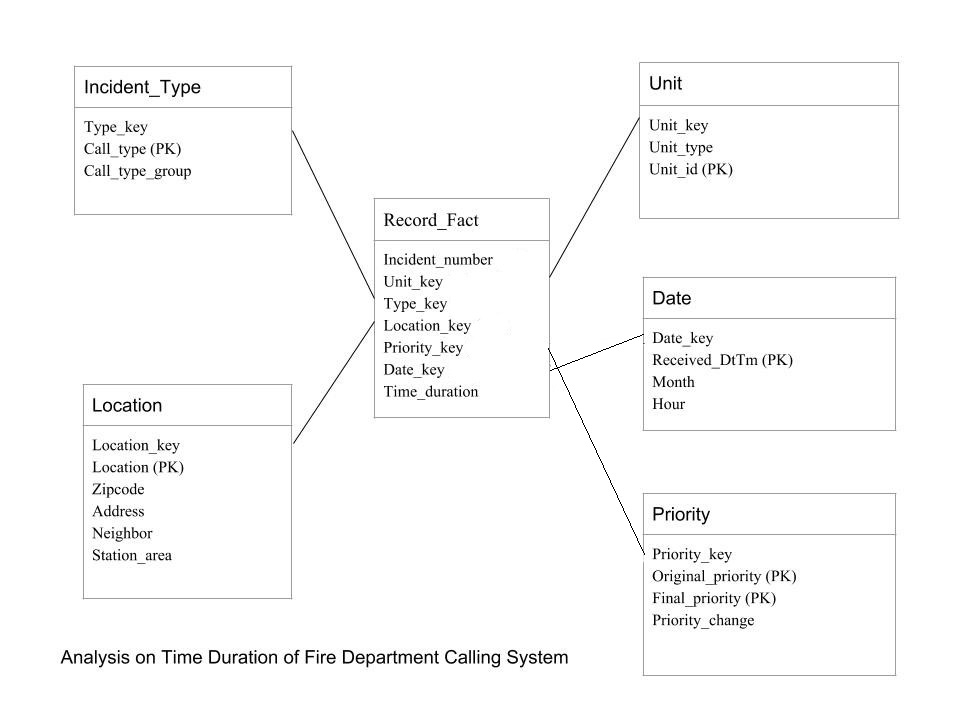

In [14]:
from IPython.display import Image
Image(filename='group_schema.jpg') 


### 2.4 Create table and import

In [21]:
!wc -l dataV2.csv

441892 dataV2.csv


In [22]:
!head dataV2.csv|csvstat

  1. "﻿Unit_ID"

	Type of data:          Text
	Contains null values:  False
	Unique values:         9
	Longest value:         3 characters
	Most common values:    E43 (1x)
	                       85 (1x)
	                       62 (1x)
	                       E23 (1x)
	                       79 (1x)

  2. "Incident_Number"

	Type of data:          Number
	Contains null values:  False
	Unique values:         7
	Smallest value:        16,000,548
	Largest value:         16,000,555
	Sum:                   144,004,968
	Mean:                  16,000,552
	Median:                16,000,552
	StDev:                 2.449
	Most common values:    16,000,555 (2x)
	                       16,000,550 (2x)
	                       16,000,554 (1x)
	                       16,000,553 (1x)
	                       16,000,552 (1x)

  3. "Call_Type"

	Type of data:          Text
	Contains null values:  False
	Unique values:         3
	Longest value:         17 characters
	Most common values:    Medical Inciden

In [1]:
%load_ext sql

In [24]:
!dropdb -U student group19

In [25]:
!createdb -U student group19

In [2]:
%sql postgresql://student@/group19

'Connected: student@group19'

In [27]:
!csvcut -n dataV2.csv

  1: ﻿Unit_ID
  2: Incident_Number
  3: Call_Type
  4: Received_DtTm_Full
  5: Received_DtTm_Year
  6: Received_DtTm_Month
  7: Received_DtTm_Hour
  8: Onscene_DtTm_Full
  9: Time_duration
 10: Address
 11: Zipcode
 12: Station_Area
 13: Original_Priority
 14: Final_Priority
 15: Call Type Group
 16: Unit Type
 17: Neighborhooods - Analysis Boundaries
 18: Location


In [28]:
%%sql
DROP TABLE IF EXISTS incident_fact;

CREATE TABLE incident_fact (
    Unit_ID VARCHAR(50) NOT NULL,
    Incident_Number VARCHAR(50) NOT NULL,
    Call_Type VARCHAR(50) NOT NULL,
    Received_DtTm_Full TIMESTAMP NOT NULL,
    Received_DtTm_Year INTEGER NOT NULL,
    Received_DtTm_Month INTEGER NOT NULL,
    Received_DtTm_Hour INTEGER NOT NULL,
    Onscene_DtTm_Full TIMESTAMP NOT NULL,
    Time_duration INTEGER NOT NULL,
    Address VARCHAR(100) NOT NULL,
    Zipcode VARCHAR(50) NOT NULL,
    Station_Area VARCHAR(50) NOT NULL,
    Original_Priority INTEGER NOT NULL,
    Final_Priority INTEGER NOT NULL,
    Call_Type_Group VARCHAR(50) NOT NULL,
    Unit_Type VARCHAR(50) NOT NULL,
    Neighborhood VARCHAR(50) NOT NULL,
    Location VARCHAR(50) NOT NULL
)

 * postgresql://student@/group19
Done.
Done.


[]

In [30]:
!pwd

/home/ubuntu/Group_Projects/FP


In [31]:
%%sql
COPY incident_fact FROM '/home/ubuntu/Group_Projects/FP/dataV2.csv'
CSV
HEADER;

 * postgresql://student@/group19
441891 rows affected.


[]

In [32]:
%%sql
select * from incident_fact
limit 10

 * postgresql://student@/group19
10 rows affected.


unit_id,incident_number,call_type,received_dttm_full,received_dttm_year,received_dttm_month,received_dttm_hour,onscene_dttm_full,time_duration,address,zipcode,station_area,original_priority,final_priority,call_type_group,unit_type,neighborhood,location
E43,16000555,Medical Incident,2016-01-01 23:50:23,2016,1,23,2016-01-01 23:58:21,478,5000 Block of MISSION ST,94112,43,3,3,Potentially Life-Threatening,ENGINE,Outer Mission,"(37.7174988976749, -122.440357992837)"
85,16000555,Medical Incident,2016-01-01 23:50:23,2016,1,23,2016-01-01 23:59:41,558,5000 Block of MISSION ST,94112,43,3,3,Potentially Life-Threatening,MEDIC,Outer Mission,"(37.7174988976749, -122.440357992837)"
62,16000554,Medical Incident,2016-01-01 23:48:57,2016,1,23,2016-01-01 23:58:54,597,0 Block of GARNETT TER,94124,17,3,3,Potentially Life-Threatening,MEDIC,Bayview Hunters Point,"(37.7327997583863, -122.381958643275)"
E23,16000553,Outside Fire,2016-01-01 23:49:32,2016,1,23,2016-01-01 23:54:37,305,JUDAH ST/GREAT HY,94122,23,3,3,Fire,ENGINE,Sunset/Parkside,"(37.7602716873667, -122.509381620507)"
79,16000552,Medical Incident,2016-01-01 23:40:24,2016,1,23,2016-01-01 23:51:54,690,16TH ST/VALENCIA ST,94103,6,2,2,Non Life-threatening,MEDIC,Mission,"(37.7649173790256, -122.421886447232)"
60,16000551,Medical Incident,2016-01-01 23:37:32,2016,1,23,2016-01-01 23:48:42,670,100 Block of UTAH ST,94103,29,2,2,Non Life-threatening,MEDIC,Mission,"(37.7677826861899, -122.406668803339)"
E01,16000550,Medical Incident,2016-01-01 23:36:46,2016,1,23,2016-01-01 23:42:35,349,1100 Block of MARKET ST,94102,1,2,2,Potentially Life-Threatening,ENGINE,Tenderloin,"(37.7796660426062, -122.41371122073)"
89,16000550,Medical Incident,2016-01-01 23:36:46,2016,1,23,2016-01-01 23:46:33,587,1100 Block of MARKET ST,94102,1,2,2,Potentially Life-Threatening,MEDIC,Tenderloin,"(37.7796660426062, -122.41371122073)"
T03,16000548,Traffic Collision,2016-01-01 23:29:11,2016,1,23,2016-01-01 23:31:47,156,POLK ST/MCALLISTER ST,94102,3,3,3,Potentially Life-Threatening,TRUCK,Tenderloin,"(37.7802601311974, -122.418598510275)"
RS1,16000548,Traffic Collision,2016-01-01 23:29:11,2016,1,23,2016-01-01 23:38:47,576,POLK ST/MCALLISTER ST,94102,3,3,3,Potentially Life-Threatening,RESCUE SQUAD,Tenderloin,"(37.7802601311974, -122.418598510275)"


create a new column of time_duration

### 2.5 Create the dimension table of date

In [33]:
%%sql
select distinct Received_DtTm_Full, Received_DtTm_Year, Received_DtTm_Month,Received_DtTm_Hour
from incident_fact
limit 10;

 * postgresql://student@/group19
10 rows affected.


received_dttm_full,received_dttm_year,received_dttm_month,received_dttm_hour
2016-01-01 00:00:43,2016,1,0
2016-01-01 00:02:57,2016,1,0
2016-01-01 00:03:02,2016,1,0
2016-01-01 00:05:48,2016,1,0
2016-01-01 00:07:05,2016,1,0
2016-01-01 00:08:52,2016,1,0
2016-01-01 00:10:03,2016,1,0
2016-01-01 00:10:29,2016,1,0
2016-01-01 00:12:28,2016,1,0
2016-01-01 00:14:01,2016,1,0


In [34]:
%%sql
DROP TABLE IF EXISTS date;

CREATE TABLE date (
    date_key SERIAL PRIMARY KEY,
    received_dttm TIMESTAMP NOT NULL,
    year integer,
    month integer,
    hour integer
);

 * postgresql://student@/group19
Done.
Done.


[]

In [35]:
%%sql
INSERT INTO date (received_dttm, year, month,hour)
select distinct Received_DtTm_Full, Received_DtTm_Year, Received_DtTm_Month,Received_DtTm_Hour
from incident_fact;

 * postgresql://student@/group19
253575 rows affected.


[]

In [36]:
%%sql
ALTER TABLE incident_fact
ADD COLUMN date_key INTEGER,
ADD CONSTRAINT fk_date_key
    FOREIGN KEY (date_key)
    REFERENCES date (date_key);

 * postgresql://student@/group19
Done.


[]

In [37]:
%%sql
DROP INDEX IF EXISTS idx_date;

CREATE INDEX idx_date ON date (received_dttm, year, month,hour);

 * postgresql://student@/group19
Done.
Done.


[]

In [38]:
%%sql
UPDATE incident_fact
SET date_key = date.date_key
FROM date
WHERE incident_fact.Received_DtTm_Full = date.received_dttm 

 * postgresql://student@/group19
441891 rows affected.


[]

### 2.6 Create the dimension table of Location

In [39]:
%%sql
select distinct Location, Address, Zipcode,Neighborhood,Station_Area
from incident_fact
limit 10;

 * postgresql://student@/group19
10 rows affected.


location,address,zipcode,neighborhood,station_area
"(37.7082559612604, -122.454281124683)",MISSION ST/HURON AV,94112,Outer Mission,33
"(37.7082655293119, -122.445953023533)",400 Block of HANOVER ST,94112,Excelsior,33
"(37.70826552966388, -122.44595302316023)",400 Block of HANOVER ST,94112,Excelsior,33
"(37.7082655296639, -122.44595302316)",400 Block of HANOVER ST,94112,Excelsior,33
"(37.7082764479784, -122.45198902325)",0 Block of BRUMISS TER,94112,Excelsior,33
"(37.7082795466179, -122.426856547019)",800 Block of RED LEAF CT,94134,None,43
"(37.7083112668674, -122.420083068533)",GENEVA AV/SANTOS ST,94134,None,43
"(37.7083112668674, -122.420083068533)",SANTOS ST/GENEVA AV,94134,None,43
"(37.7083216255827, -122.42054528003)","GENEVA AV/SANTOS ST, DC",94134,None,43
"(37.70833306997021, -122.4656911222193)",0 Block of SANTA CRUZ AVE,94112,Outer Mission,33


In [40]:
%%sql
DROP TABLE IF EXISTS location;

CREATE TABLE location (
    location_key SERIAL PRIMARY KEY,
    loc VARCHAR(100) NOT NULL,
    zipcode VARCHAR(50),
    address VARCHAR(100),
    neighbor VARCHAR(100),
    station_area VARCHAR(50)
);

 * postgresql://student@/group19
Done.
Done.


[]

In [41]:
%%sql
INSERT INTO location (loc, zipcode, address,neighbor,station_area)
select distinct Location, Zipcode,Address,Neighborhood,Station_Area
from incident_fact;

 * postgresql://student@/group19
42958 rows affected.


[]

In [42]:
%%sql
ALTER TABLE incident_fact
ADD COLUMN location_key INTEGER,
ADD CONSTRAINT fk_location_key
    FOREIGN KEY (location_key)
    REFERENCES location (location_key);

 * postgresql://student@/group19
Done.


[]

In [43]:
%%sql
DROP INDEX IF EXISTS idx_location;

CREATE INDEX idx_location ON location(loc, zipcode, address,neighbor,station_area);

 * postgresql://student@/group19
Done.
Done.


[]

In [44]:
%%sql
UPDATE incident_fact
SET location_key = location.location_key
FROM location
WHERE incident_fact.location = location.loc;

 * postgresql://student@/group19
441891 rows affected.


[]

### 2.7 create a dimension table of priority

In [45]:
%%sql
select distinct Original_Priority, Final_Priority
from incident_fact
limit 10;

 * postgresql://student@/group19
4 rows affected.


original_priority,final_priority
3,3
3,2
2,2
2,3


In [46]:
%%sql
DROP TABLE IF EXISTS priority;

CREATE TABLE priority (
    priority_key SERIAL PRIMARY KEY,
    original_priority integer,
    final_priority integer,
    priority_change integer
);

 * postgresql://student@/group19
Done.
Done.


[]

In [47]:
%%sql
INSERT INTO priority (original_priority, final_priority)
select distinct original_priority, final_priority
from incident_fact;

 * postgresql://student@/group19
4 rows affected.


[]

In [48]:
%%sql
UPDATE priority
set priority_change = original_priority-final_priority;

 * postgresql://student@/group19
4 rows affected.


[]

In [49]:
%%sql
select *
from priority;

 * postgresql://student@/group19
4 rows affected.


priority_key,original_priority,final_priority,priority_change
1,3,3,0
2,3,2,1
3,2,2,0
4,2,3,-1


In [50]:
%%sql
ALTER TABLE incident_fact
ADD COLUMN priority_key INTEGER,
ADD CONSTRAINT fk_priority_key
    FOREIGN KEY (priority_key)
    REFERENCES priority (priority_key);

 * postgresql://student@/group19
Done.


[]

In [51]:
%%sql
DROP INDEX IF EXISTS idx_priority;

CREATE INDEX idx_priority ON priority (original_priority, final_priority);

 * postgresql://student@/group19
Done.
Done.


[]

In [52]:
%%sql
UPDATE incident_fact
SET priority_key= priority.priority_key
FROM priority
WHERE incident_fact.original_priority = priority.original_priority
    and incident_fact.final_priority = priority.final_priority;

 * postgresql://student@/group19
441891 rows affected.


[]

### 2.8 Create a dimension table of type

In [53]:
%%sql
select distinct call_type,call_type_group
from incident_fact
limit 20;

 * postgresql://student@/group19
20 rows affected.


call_type,call_type_group
Fuel Spill,Alarm
Traffic Collision,Potentially Life-Threatening
Outside Fire,Fire
Other,Potentially Life-Threatening
Suspicious Package,Fire
Water Rescue,Fire
Confined Space / Structure Collapse,Fire
Medical Incident,Potentially Life-Threatening
Vehicle Fire,Fire
Gas Leak (Natural and LP Gases),Alarm


In [54]:
%%sql
DROP TABLE IF EXISTS type;

CREATE TABLE type (
    type_key SERIAL PRIMARY KEY,
    type varchar(50) not null,
    type_group varchar(50)
);

 * postgresql://student@/group19
Done.
Done.


[]

In [55]:
%%sql
INSERT INTO type (type, type_group)
select distinct call_type,call_type_group
from incident_fact;

 * postgresql://student@/group19
38 rows affected.


[]

In [56]:
%%sql
ALTER TABLE incident_fact
ADD COLUMN type_key INTEGER,
ADD CONSTRAINT fk_type_key
    FOREIGN KEY (type_key)
    REFERENCES type (type_key);

 * postgresql://student@/group19
Done.


[]

In [57]:
%%sql
DROP INDEX IF EXISTS idx_type;

CREATE INDEX idx_type ON type (type, type_group);

 * postgresql://student@/group19
Done.
Done.


[]

In [58]:
%%sql
UPDATE incident_fact
SET type_key = type.type_key
FROM type
WHERE incident_fact.call_type = type.type
    and incident_fact.call_type_group = type.type_group;

 * postgresql://student@/group19
441891 rows affected.


[]

### 2.9 Create a dimension table of unit

In [59]:
%%sql
select distinct unit_id, unit_type
from incident_fact
limit 10;

 * postgresql://student@/group19
10 rows affected.


unit_id,unit_type
FB1,SUPPORT
MCT1,SUPPORT
CD3,CHIEF
AM124,PRIVATE
T14,TRUCK
E40,ENGINE
95,MEDIC
T48,TRUCK
KM12,PRIVATE
SO19,SUPPORT


In [60]:
%%sql
DROP TABLE IF EXISTS unit;

CREATE TABLE unit (
    unit_key SERIAL PRIMARY KEY,
    unit_id varchar(50) not null,
    unit_type varchar(50)
);

 * postgresql://student@/group19
Done.
Done.


[]

In [61]:
%%sql
INSERT INTO unit (unit_id, unit_type)
select distinct unit_id, unit_type
from incident_fact;

 * postgresql://student@/group19
343 rows affected.


[]

In [62]:
%%sql
ALTER TABLE incident_fact
ADD COLUMN unit_key INTEGER,
ADD CONSTRAINT fk_unit_key
    FOREIGN KEY (unit_key)
    REFERENCES unit (unit_key);

 * postgresql://student@/group19
Done.


[]

In [63]:
%%sql
DROP INDEX IF EXISTS idx_unit;

CREATE INDEX idx_unit ON unit (unit_id, unit_type);

 * postgresql://student@/group19
Done.
Done.


[]

In [64]:
%%sql
UPDATE incident_fact
SET unit_key = unit.unit_key
FROM unit
WHERE incident_fact.unit_id = unit.unit_id
    and incident_fact.unit_type = unit.unit_type;

 * postgresql://student@/group19
441891 rows affected.


[]

### 2.10 drop irrelevant columns and get the star schema

In [65]:
%%sql
ALTER TABLE incident_fact
DROP COLUMN Unit_ID,
DROP COLUMN Call_Type,
DROP COLUMN Received_DtTm_Full,
DROP COLUMN Received_DtTm_Year,
DROP COLUMN Received_DtTm_Month,
DROP COLUMN Received_DtTm_Hour,
DROP COLUMN Onscene_DtTm_Full,
DROP COLUMN Address,
DROP COLUMN Zipcode,
DROP COLUMN Station_Area,
DROP COLUMN Original_Priority,
DROP COLUMN Final_Priority,
DROP COLUMN Call_Type_Group,
DROP COLUMN Unit_Type,
DROP COLUMN Neighborhood ,
DROP COLUMN Location;

 * postgresql://student@/group19
Done.


[]

In [66]:
%%sql
select *
from incident_fact
limit 10;

 * postgresql://student@/group19
10 rows affected.


incident_number,time_duration,date_key,location_key,priority_key,type_key,unit_key
17103495,399,217265,15796,4,24,230
16101909,1645,90617,15982,3,8,283
16108384,1410,96321,15831,3,8,154
16120873,643,107324,15839,3,8,207
16113316,574,100651,38953,3,8,17
16118327,653,105054,804,3,8,207
17048647,225,173042,21885,1,36,157
17047931,289,172392,19800,1,36,294
17051840,462,175861,25596,1,36,151
17059666,421,182867,11490,1,36,39


## PART 3 - Data Exploration

### Theme 1: Time/Date of the Incident

#### 1.1 Which hour during the day has greatest/least number of incidents?

<b>FINDINGS:</b></br>
The number of incidents have clear distinction according to the time of the day. It seems that there are less number of incidents from 12:00 AM to 8:00 AM which is night time, and most incidents called in in day time from 9:00 AM to 11:00PM.

We assumed maybe it was related to what type of incidents are most likely to happen in that time of the day. However, throughout the whole hour of a day, the most frequent type of an incident happen are all medical incidents with constant percentage of roughly 70%. So we figured that the type of an incident are not likely to be related to the time of the day and this does not explain the differences in the number of incidents that happens during any period of time in a day.

In [72]:
%%sql
SELECT hour, count(incident_number)
FROM incident_fact
JOIN date
ON incident_fact.date_key=date.date_key
GROUP BY hour
ORDER BY hour;

 * postgresql://student@/group19
24 rows affected.


hour,count
0,14064
1,12651
2,11606
3,9886
4,8711
5,8703
6,10551
7,13890
8,17476
9,20522


In [73]:
import matplotlib as plt

<BarContainer object of 24 artists>

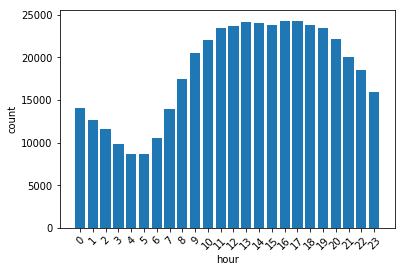

In [74]:
_.bar()

In [4]:
%%sql
SELECT hour, type, counts as count_by_hour, hour_sum_count, ROUND((counts * 100.0 / hour_sum_count),2) as percentage
FROM (SELECT type, hour, counts, max(counts) over (partition by hour) as max_count, sum(counts) over (partition by hour) as hour_sum_count
        FROM (SELECT type, hour, count(incident_number) as counts
                 FROM incident_fact
                 JOIN date ON incident_fact.date_key=date.date_key
                 JOIN type ON incident_fact.type_key=type.type_key
                 GROUP BY hour, type
                 ORDER BY hour, counts) as t) as b
WHERE counts=max_count
ORDER BY hour; 

 * postgresql://student@/group19
24 rows affected.


hour,type,count_by_hour,hour_sum_count,percentage
0,Medical Incident,10103,14064,71.84
1,Medical Incident,9322,12651,73.69
2,Medical Incident,8434,11606,72.67
3,Medical Incident,7022,9886,71.03
4,Medical Incident,6049,8711,69.44
5,Medical Incident,6091,8703,69.99
6,Medical Incident,7492,10551,71.01
7,Medical Incident,9788,13890,70.47
8,Medical Incident,12191,17476,69.76
9,Medical Incident,14595,20522,71.12


#### 1.2 Which hour of the day has the shortest/longest average time duration for each incident?

<b>FINDINGS:</b></br>
The average duration of the incident have two peaking time slots which are 5:00 AM to 9:00 AM, and 14:00PM to 18:00 PM. From researching further, we found that this is very similar to standard rush hours in San Francisco. In regards, we think that the average response time is related to how the traffic situation of the city. 

In [76]:
%%sql
SELECT hour, avg(time_duration)
FROM incident_fact
JOIN date
ON incident_fact.date_key=date.date_key
GROUP BY hour
ORDER BY hour;

 * postgresql://student@/group19
24 rows affected.


hour,avg
0,547.4718430034129693
1,549.8721049719389772
2,553.4884542478028606
3,547.8842808011329152
4,583.7021007921019401
5,596.2965644030793979
6,588.2489811392285091
7,610.7598272138228942
8,598.1530670634012360
9,582.4151642140142286


<BarContainer object of 24 artists>

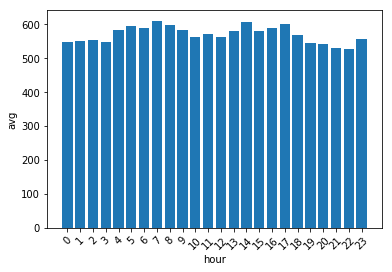

In [77]:
_.bar()

#### 1.3 Does the time of the incident have relations to the type of the incident?

<b>FINDINGS:</b></br>

Although the total number of incidents occured in a certain hour do not seem to be affected by the type of the incidents occured, we still thought that a certain type of incidents are predominantly likely to occur in a certain time period. 

So, we counted the number of a cetain type of incident that happens by hour, counted them and calculated the percentage of the frequency based on the total number of that type of incidents occured. We figured if the occurence percentage is over 4.17%(100%/24), this incident is likely to happen more often in that certain time of the day. In regards, we see that 57.14% of incidents such as suspicous packages are likely to happen near 4:00 AM, when people are not likely to be around. So, we think through this analysis, the Fire Department can figure what type of incident they are likely to be looking for according to a time period. 

In [78]:
%%sql
SELECT type, hour, counts as count_by_hour, type_sum_count, ROUND((counts * 100.0 / type_sum_count),2) as percentage
FROM (SELECT type, hour, counts, max(counts) over (partition by type) as max_count, sum(counts) over (partition by type) as type_sum_count
        FROM (SELECT type, hour, count(incident_number) as counts
                 FROM incident_fact
                 JOIN date ON incident_fact.date_key=date.date_key
                 JOIN type ON incident_fact.type_key=type.type_key
                 GROUP BY type, hour
                 ORDER BY hour, counts) as t) as b
WHERE counts=max_count
ORDER BY percentage DESC;

 * postgresql://student@/group19
31 rows affected.


type,hour,count_by_hour,type_sum_count,percentage
Oil Spill,17,1,1,100.00
Suspicious Package,16,4,7,57.14
Watercraft in Distress,6,5,12,41.67
Watercraft in Distress,15,5,12,41.67
High Angle Rescue,18,11,47,23.40
Industrial Accidents,11,12,53,22.64
Mutual Aid / Assist Outside Agency,23,17,78,21.79
Train / Rail Incident,23,22,107,20.56
"Extrication / Entrapped (Machinery, Vehicle)",10,16,84,19.05
Explosion,21,16,89,17.98


### Theme 2: Location of the Incident

#### 2.1 Which neighborhood has most count for certain type of incident?

<b>FINDINGS:</b></br>
In most neighborhoods, the most frequent incident type group is potentially life-threatening group (besides Seacliff has more alarm-related incidents), which indicates that most calls are life-threatening related. Among all neighbors, Tenderloin, South of Market, and Mission are the top three neighborhoods with most life-threatening incidents(over 20000). Thus, the fire department may relocate their police resources more in those neighborhoods.

In [80]:
%%sql
SELECT neighbor, type_group, counts as major_type_group_count, neighbor_sum_count, 
        to_char((counts * 100.0 / neighbor_sum_count),'FM990.00" %"') as percentage
FROM (SELECT neighbor, type_group, counts, max(counts) over (partition by neighbor) as max_count, 
              sum(counts) over (partition by neighbor) as neighbor_sum_count
        FROM (SELECT neighbor, type_group, count(type_group) as counts 
                  FROM incident_fact
                  JOIN location ON incident_fact.location_key=location.location_key
                  JOIN type ON incident_fact.type_key=type.type_key
                  GROUP BY neighbor, type_group
                  ORDER BY neighbor, counts) as t) as b
WHERE counts = max_count
ORDER BY major_type_group_count DESC;


 * postgresql://student@/group19
42 rows affected.


neighbor,type_group,major_type_group_count,neighbor_sum_count,percentage
Tenderloin,Potentially Life-Threatening,33059,59453,55.61 %
South of Market,Potentially Life-Threatening,23608,43616,54.13 %
Mission,Potentially Life-Threatening,20140,39026,51.61 %
Financial District/South Beach,Potentially Life-Threatening,14160,31116,45.51 %
Bayview Hunters Point,Potentially Life-Threatening,11177,22053,50.68 %
Sunset/Parkside,Potentially Life-Threatening,8431,16704,50.47 %
Western Addition,Potentially Life-Threatening,7963,16245,49.02 %
Nob Hill,Potentially Life-Threatening,6855,14256,48.09 %
Outer Richmond,Potentially Life-Threatening,5909,12340,47.88 %
Castro/Upper Market,Potentially Life-Threatening,5580,11451,48.73 %


In [81]:
!wget https://s3.amazonaws.com/yoonacha-dmfa/2.1.png

--2018-12-10 03:13:13--  https://s3.amazonaws.com/yoonacha-dmfa/2.1.png
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.130.125
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.130.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77434 (76K) [image/png]
Saving to: ‘2.1.png’

2.1.png             100%[===================>]  75.62K  --.-KB/s    in 0.004s  

2018-12-10 03:13:13 (18.3 MB/s) - ‘2.1.png’ saved [77434/77434]



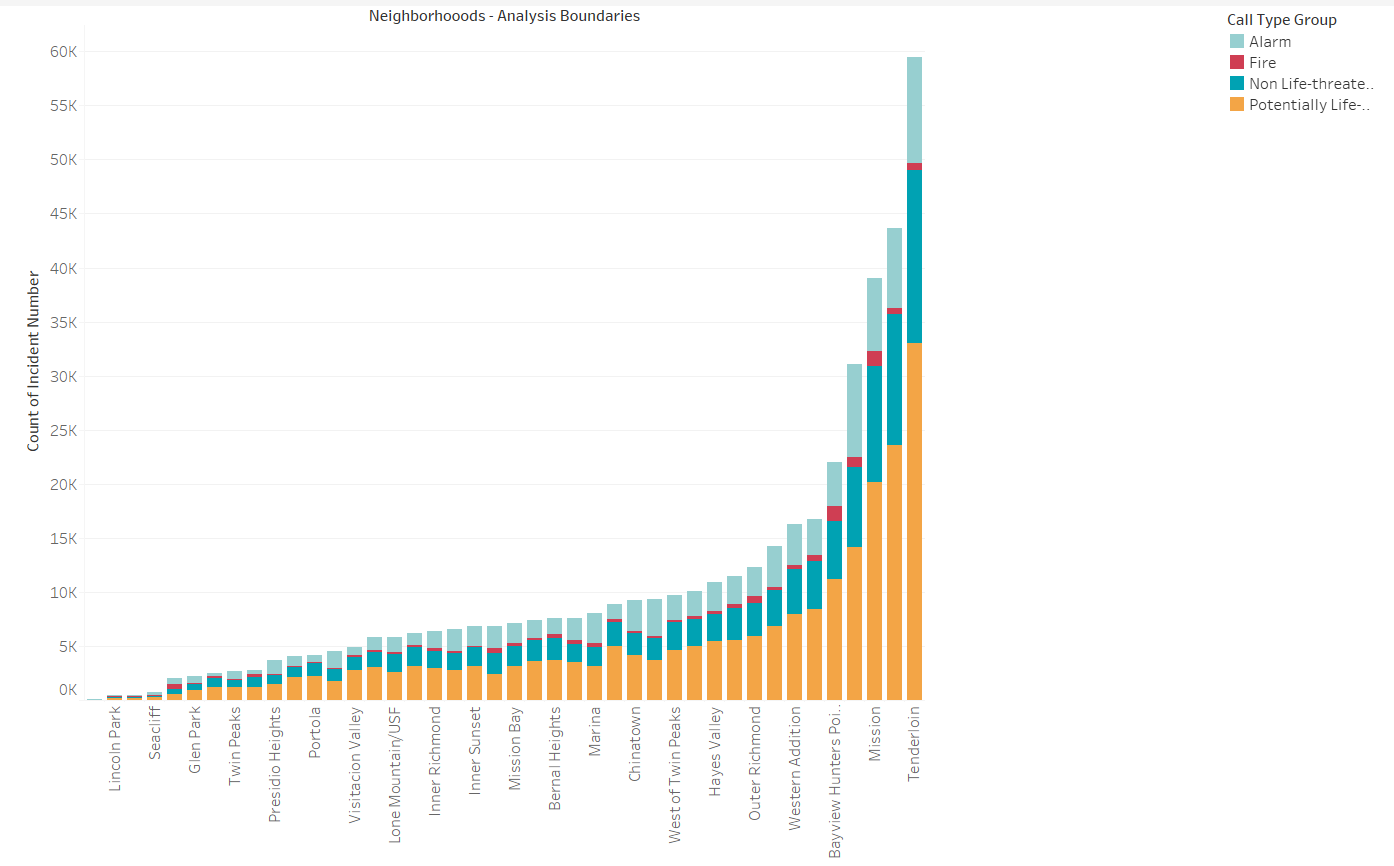

In [82]:
from IPython.display import Image
Image(filename= '2.1.png') 

Visualization:</br> Count of Incident Number for each neighborhoods. Color shows details about call type. 

#### 2.2 Which neighborhood has the least avg time_duration?

<b>FINDINGS:</b></br>
Overall, Nob hill and Pacific Heights police use the shortest time to arrive to the scene, and they're the only two neighborhoods need time less than 500 seconds, while Treasure Island needs more than 800 seconds waiting for the police. Combining with the info from last table (2.1), Nob Hill has 6000 counts more than 48% of life-threatening calls may be the reason that police are fully practiced and perfect efficiency; and Treasure Island got 45% of life-threatening calls with 1193 counts, yet they may need to improve their efficiencies.  

In [83]:
%%sql
SELECT neighbor, round(avg(time_duration),2)
FROM incident_fact
JOIN location
ON incident_fact.location_key=location.location_key
GROUP BY neighbor
ORDER BY avg(time_duration)
limit 5;

 * postgresql://student@/group19
5 rows affected.


neighbor,round
Nob Hill,487.98
Pacific Heights,491.94
Noe Valley,508.48
Presidio Heights,518.82
Inner Richmond,522.79


In [84]:
%%sql
SELECT neighbor, round(avg(time_duration),2)
FROM incident_fact
JOIN location
ON incident_fact.location_key=location.location_key
GROUP BY neighbor
ORDER BY avg(time_duration) DESC
limit 5;

 * postgresql://student@/group19
5 rows affected.


neighbor,round
Treasure Island,807.67
Lincoln Park,740.39
Presidio,732.73
Bernal Heights,730.15
Visitacion Valley,714.71


In [85]:
!wget https://s3.amazonaws.com/yoonacha-dmfa/neighborhood.png

--2018-12-10 03:14:32--  https://s3.amazonaws.com/yoonacha-dmfa/neighborhood.png
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.162.93
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.162.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 515425 (503K) [image/png]
Saving to: ‘neighborhood.png’

neighborhood.png    100%[===================>] 503.34K  --.-KB/s    in 0.01s   

2018-12-10 03:14:32 (38.3 MB/s) - ‘neighborhood.png’ saved [515425/515425]



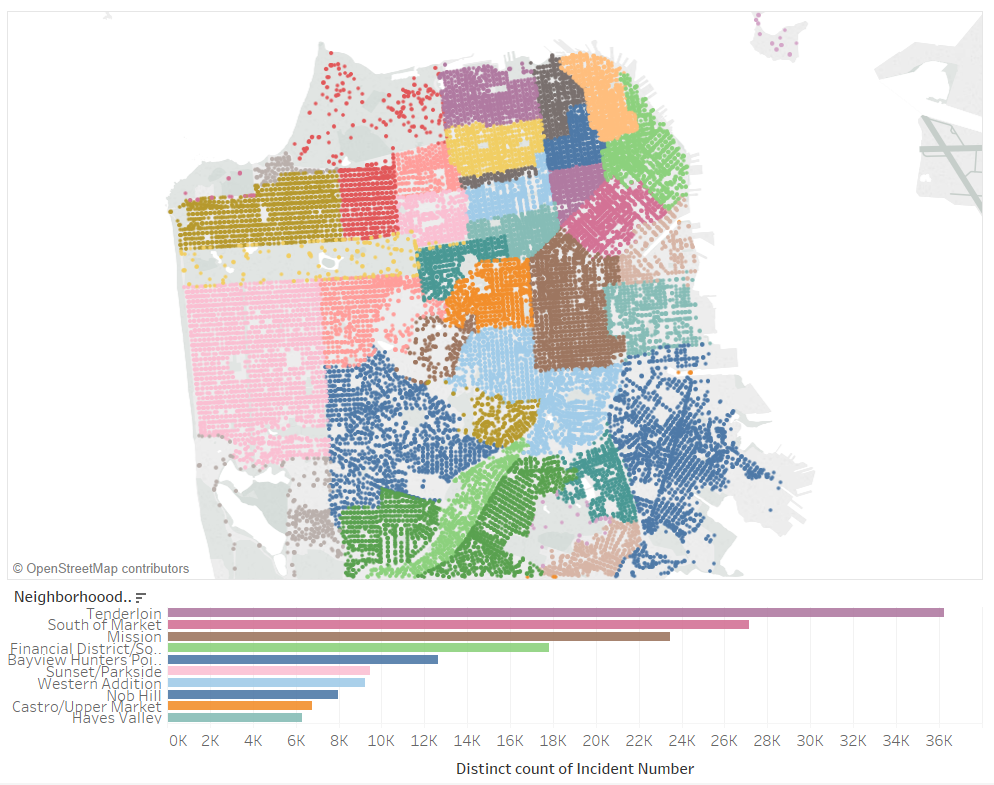

In [86]:
from IPython.display import Image
Image(filename= 'neighborhood.png') 

Visualization:</br> The map contains distinct count of incident number for each neighborhoods. color shows details about neighborhoods. The bar graph shows the neighborhoods with top ten count of incident numbers.

In [87]:
!wget https://s3.amazonaws.com/yoonacha-dmfa/zipcode.png

--2018-12-10 03:57:18--  https://s3.amazonaws.com/yoonacha-dmfa/zipcode.png
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.228.27
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.228.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 215946 (211K) [image/png]
Saving to: ‘zipcode.png’

zipcode.png         100%[===================>] 210.88K  --.-KB/s    in 0.005s  

2018-12-10 03:57:18 (38.7 MB/s) - ‘zipcode.png’ saved [215946/215946]



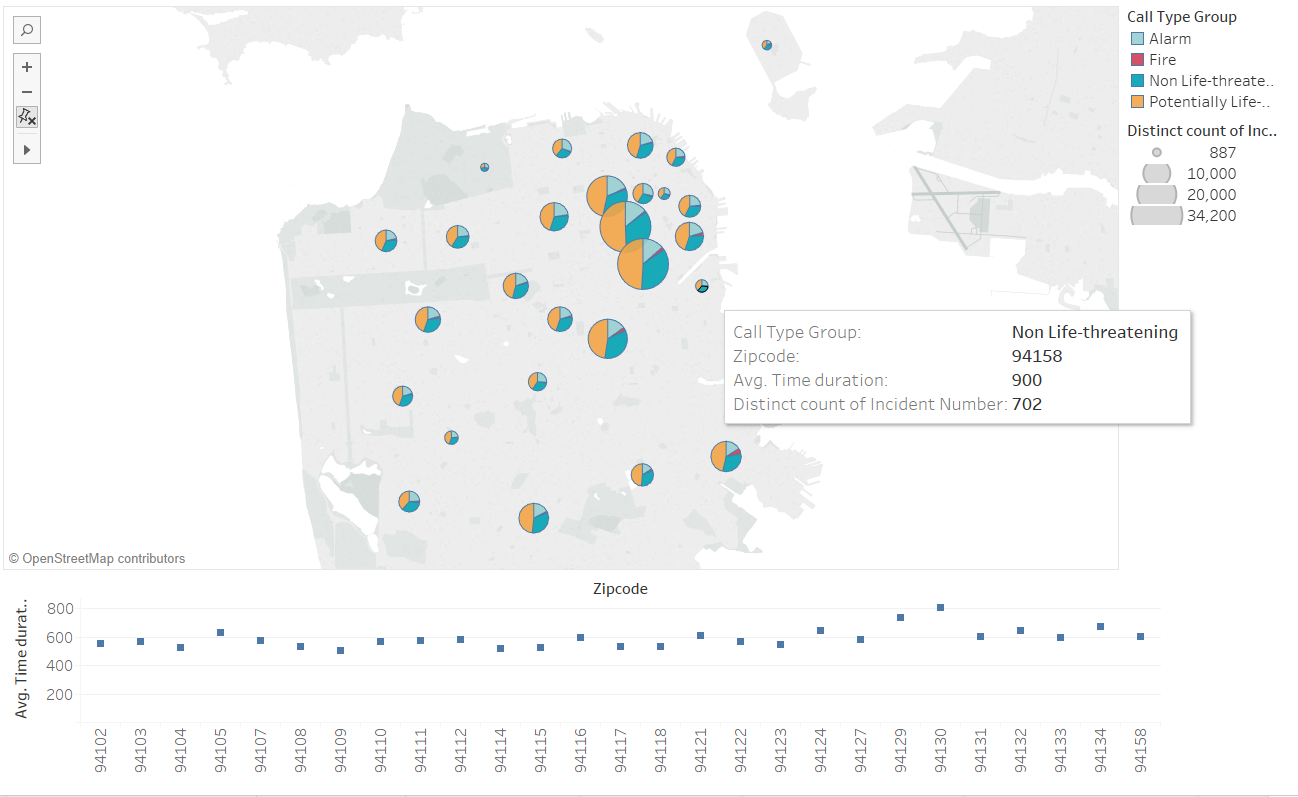

In [88]:
from IPython.display import Image
Image(filename= 'zipcode.png') 

Visualization:</br> The graph shows the overall average time duration in each zip code area, the tooltip in the map shows the average time duration and count of incident for each call type group in each zip code area. And we can see that most calls are in potenial life-thretening group in each zip code area, and there is very few fire-related calls. From the dot graph below, we can see that the average time duration in most zip code area are similar, besides 94130 area has a bit longer time duration than others.

### Theme 3: Call Type of the Incident

#### 3.1 What are the frequencies of each call type of incident?

<b>FINDINGS:</b></br>
In all types of incident, we find that the medical incidents demonstrates the most(71.01%), the second is alarm(11.07%) and the third (7.25%) is structure fire.  As the count of medical incidents is over 300000, it indicates that most incidents are medical related and the fire department could focus more on the medical incidents.  Beyond that, the counts of alarm, structure fire and traffic collisions are over 30000 so they also need the attention from the fire department.

In [89]:
%%sql
SELECT type, count(*),to_char((count(incident_number) * 100.0/ sum(count(*)) OVER ()), 'FM990.00" %"') as percentage
FROM incident_fact
JOIN type
ON incident_fact.type_key=type.type_key
GROUP BY type
ORDER BY count(*) DESC;

 * postgresql://student@/group19
27 rows affected.


type,count,percentage
Medical Incident,313780,71.01 %
Alarms,49359,11.17 %
Structure Fire,32024,7.25 %
Traffic Collision,16828,3.81 %
Citizen Assist / Service Call,6920,1.57 %
Other,6214,1.41 %
Outside Fire,5101,1.15 %
Gas Leak (Natural and LP Gases),2454,0.56 %
Water Rescue,2043,0.46 %
Electrical Hazard,1766,0.40 %


#### 3.2 How does the average time duration differ among the call type?

<b>FINDINGS:</b></br>
When it comes to the type_groups, we learned that the response time is shorter according to the urgency of an event. In other words, the response time it takes to a potentially life-threatening event is shorter than that of a non life-threatening incidents, which means that the Fire Department has protocols to efficiently manage the incidents according to it's urgency.

When it comes to a more specific types of an incident, the alarm incidents were handled most quickly, which took 404 seconds. The second is gas leak, the third is outside fire, and the fourth is electrical hazard, which indicates that the fire department performs best in these incidents.  On the other hand, although the time duration of the mutual aid/ assist outside is 2726 seconds, it might occurs due to an emergency response that exceeds local resources. Instead, the fire department could try to improve the efficiency in handling the incidents like train, suspicious package, hazmat and etc.


In [90]:
%%sql
SELECT type_group,round(avg(time_duration),2)
FROM incident_fact
JOIN type
ON incident_fact.type_key=type.type_key
GROUP BY type_group
ORDER BY avg(time_duration) DESC;

 * postgresql://student@/group19
4 rows affected.


type_group,round
Fire,857.38
Non Life-threatening,775.83
Potentially Life-Threatening,513.77
Alarm,417.68


In [91]:
%%sql
SELECT type,round(avg(time_duration),2)
FROM incident_fact
JOIN type
ON incident_fact.type_key=type.type_key
GROUP BY type
ORDER BY avg(time_duration) DESC;

 * postgresql://student@/group19
27 rows affected.


type,round
Mutual Aid / Assist Outside Agency,2726.47
Train / Rail Incident,1242.53
Suspicious Package,1132.29
HazMat,973.72
High Angle Rescue,966.34
Water Rescue,911.80
Watercraft in Distress,761.25
Confined Space / Structure Collapse,759.71
Assist Police,681.19
Oil Spill,633.00


#### 3.3 Regarding each call types, which unit is the most efficient?

<b>FINDINGS:</b></br>
The engine unit is the most efficient unit for most types of incident, especially in the incidents of alarms, extrication, explosion and gas leak. On the other hand,  the investigation unit is the most efficient for the assist police incidents while rescue captain unit works most efficiently in the electrical hazard incidents. The most efficient units in every type of incidents could set a good example for other units, which might help the fire department improve their dispatch pattern and efficiency.

In [92]:
%%sql
select type,unit_type,round(avg,2) as min_avg_time_duration
from (
  select type,
     	unit_type,
     	avg,
     	min(avg) over (partition by type) as minimum_average
  from (SELECT
	type,unit_type,avg(time_duration) as avg
	FROM incident_fact
	JOIN type
	ON incident_fact.type_key=type.type_key
	JOIn unit
	ON incident_fact.unit_key=unit.unit_key
	group by type,unit_type
	order by type,avg) b
) t
where avg = minimum_average
order by min_avg_time_duration desc;

 * postgresql://student@/group19
27 rows affected.


type,unit_type,min_avg_time_duration
Suspicious Package,PRIVATE,869.00
Water Rescue,TRUCK,797.59
Oil Spill,ENGINE,633.00
Confined Space / Structure Collapse,PRIVATE,563.00
High Angle Rescue,PRIVATE,547.00
Fuel Spill,ENGINE,542.56
Train / Rail Incident,MEDIC,519.71
Smoke Investigation (Outside),RESCUE SQUAD,489.60
Odor (Strange / Unknown),ENGINE,464.48
Elevator / Escalator Rescue,TRUCK,460.55


In [93]:
!wget https://s3.amazonaws.com/yoonacha-dmfa/3.3.png

--2018-12-10 04:02:15--  https://s3.amazonaws.com/yoonacha-dmfa/3.3.png
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.86.101
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.86.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61202 (60K) [image/png]
Saving to: ‘3.3.png’

3.3.png             100%[===================>]  59.77K  --.-KB/s    in 0.001s  

2018-12-10 04:02:15 (83.8 MB/s) - ‘3.3.png’ saved [61202/61202]



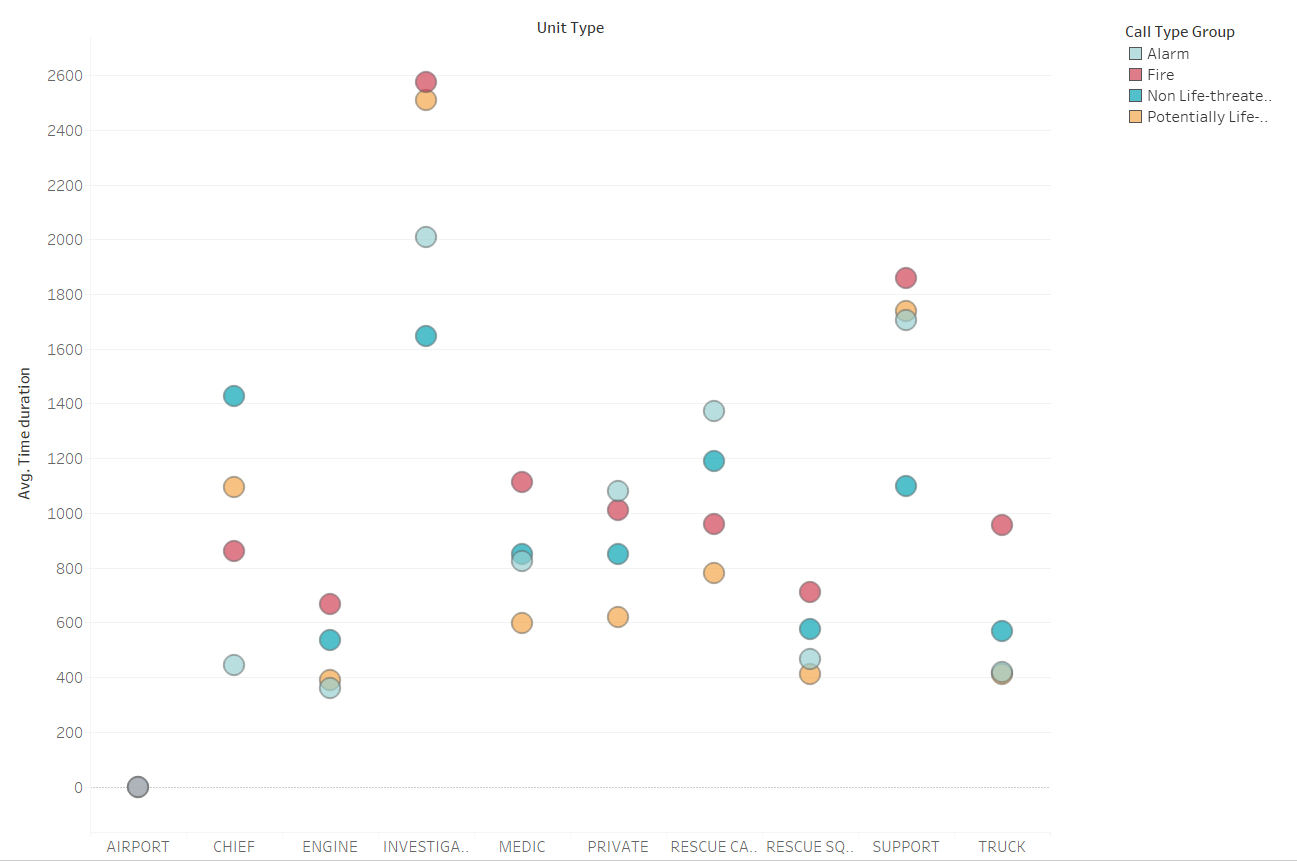

In [94]:
from IPython.display import Image
Image(filename= '3.3.png') 

Visualization: </br>
This graph visualizes the table above but reversely, it contains the infomation about average time duration for each unit type, when they are facing different type of calls. Color shows the details of call type groups. We can find out for each unit, which type group of calls would they be most or least efficient.

### Theme 4: Priority of the Incident

#### 4.1 Which unit with priority 2 is has the greatest efficiency and the least efficiency?

<b>FINDINGS:</b></br>
Water Rescue has the least efficiency with priority 2. On the other hand, Outside Fire has the greatest efficiency. Here, we can take a look at the most efficient and least efficient type separately, and continue to explore the next question regarding the priority change for differeny type. 

In [95]:
%%sql
SELECT type, final_priority, avg(time_duration)
FROM incident_fact
JOIN type 
ON incident_fact.type_key=type.type_key
JOIN Priority
ON incident_fact.priority_key=priority.priority_key
GROUP BY type, final_priority
ORDER BY avg(time_duration)
LIMIT 1;

 * postgresql://student@/group19
1 rows affected.


type,final_priority,avg
Outside Fire,2,402.2631578947368421


In [96]:
%%sql
SELECT type, final_priority, avg(time_duration)
FROM incident_fact
JOIN type 
ON incident_fact.type_key=type.type_key
JOIN Priority
ON incident_fact.priority_key=priority.priority_key
GROUP BY type, final_priority
ORDER BY avg(time_duration) DESC
LIMIT 1;

 * postgresql://student@/group19
1 rows affected.


type,final_priority,avg
Water Rescue,2,3765.1250000000000000


#### 4.2 Since original priority is related to call_type (need to check), the count of priority changes on each call_type can suggest if the department need to change the defined original priority for some call_type.


<b>FINDINGS:</b></br>
With calculation the percentage, we obtain the result of how is the change of defined original priority. From the result, we can see that type Alarms, Confined Space / Structure Collapse have a perfect record that almost no change on priority. While on the other hand, Assist Police, Extrication / Entrapped (Machinery, Vehicle), HazMat, Medical Incident, and Traffic Collision have a small proportion on -1, which means the priority has changes from 3 to 2. This indicate that the priority has increased to "urgent". Medical Incident and Traffic Collision have a small proportion of priority change from 2 to 3, which means the priority has changed to "less urgent". Among all record, we obtain that Industrial Accidents has a significant change on priority, which is roughly 60% has changed from 3 to 2, and 20% for Mutual Aid / Assist Outside Agency. This indicate a very large proportion of change, and it is necessary to reevaluate the priority level.

In [97]:
%%sql
select type,priority_change,count(*), to_char((count(*) * 100.0/ sum(count(*)) over(partition by type)), 'FM990.00" %"') as percentage
from incident_fact
JOIN type
on incident_fact.type_key=type.type_key
JOIN priority
on priority.priority_key=incident_fact.priority_key
group by priority_change,type
order by type,count(*);

 * postgresql://student@/group19
58 rows affected.


type,priority_change,count,percentage
Alarms,-1,6,0.01 %
Alarms,1,7,0.01 %
Alarms,0,49346,99.97 %
Assist Police,-1,3,5.66 %
Assist Police,0,50,94.34 %
Citizen Assist / Service Call,1,20,0.29 %
Citizen Assist / Service Call,-1,52,0.75 %
Citizen Assist / Service Call,0,6848,98.96 %
Confined Space / Structure Collapse,0,69,100.00 %
Electrical Hazard,-1,2,0.11 %


In [98]:
!wget https://s3.amazonaws.com/yoonacha-dmfa/4.2-3.png

--2018-12-10 04:07:44--  https://s3.amazonaws.com/yoonacha-dmfa/4.2-3.png
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.224.115
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.224.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70641 (69K) [image/png]
Saving to: ‘4.2-3.png’

4.2-3.png           100%[===================>]  68.99K  --.-KB/s    in 0.002s  

2018-12-10 04:07:44 (37.6 MB/s) - ‘4.2-3.png’ saved [70641/70641]



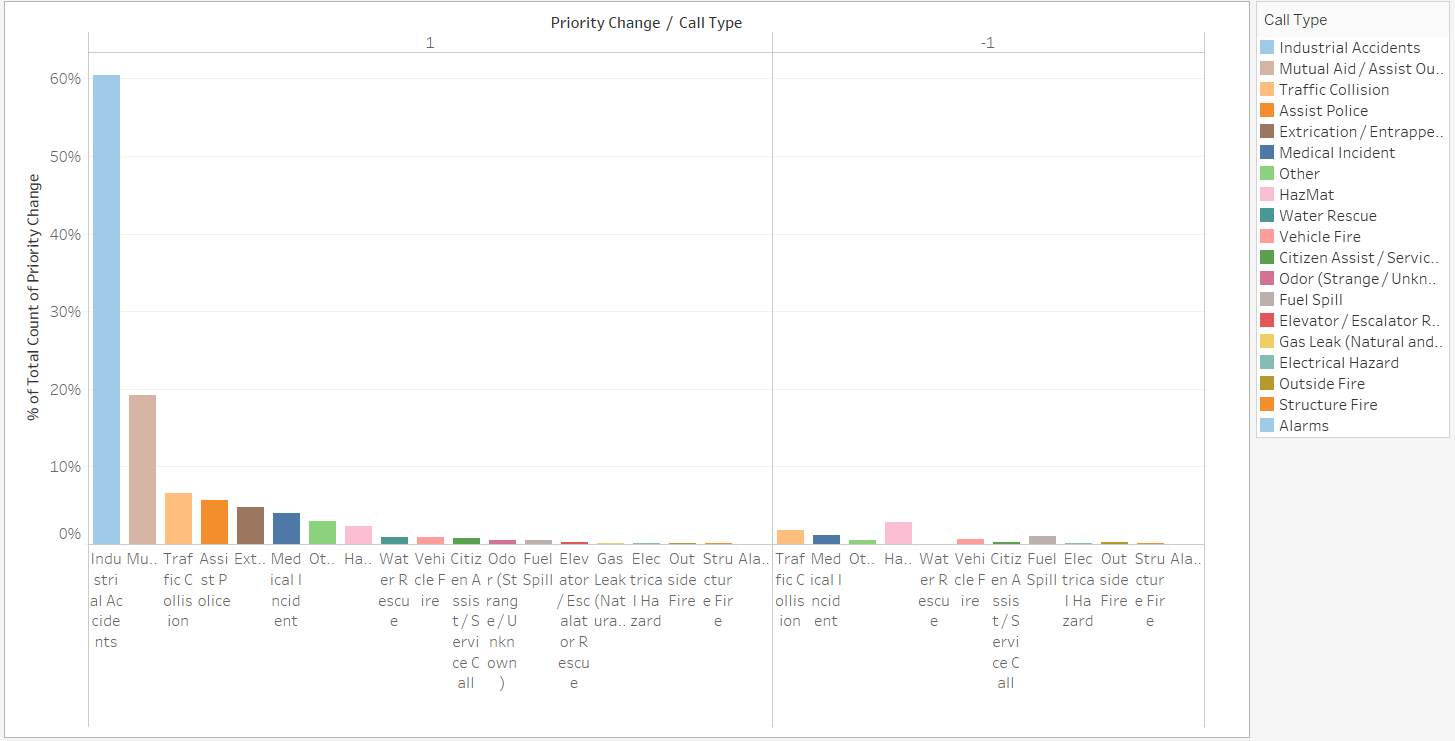

In [99]:
from IPython.display import Image
Image(filename= '4.2-3.png') 

Visualization: </br>
The graphs visualize the table above, each bar stands for the percentage of priority changes broken down by whether the original priority changed from emergent to non-emergent (code 1) or the reserve way (code -1). The color shows the details of call types. The results matches with previous findings that over 60% of Industrial accidents calls were changed to non-emergent final priority.

## PART 4 - [Bonus] Comparison between San Francisco and Las Vegas

In [100]:
%%sql
DROP TABLE IF EXISTS las_vegas;

CREATE TABLE las_vegas (
    Response_time timestamp not null,
    Hour integer,
    Month integer,
    Year integer,
    Event_type varchar(50),
    Arrive_time timestamp not null,
    Time_duration integer
   
);

 * postgresql://student@/group19
Done.
Done.


[]

In [101]:
!pwd

/home/ubuntu/Group_Projects/FP


In [102]:
%%sql
COPY las_vegas FROM '/home/ubuntu/Group_Projects/FP/Las_Vegas.csv'
CSV
HEADER;

 * postgresql://student@/group19
131040 rows affected.


[]

In [103]:
%%sql
select * 
from las_vegas
limit 10;

 * postgresql://student@/group19
10 rows affected.


response_time,hour,month,year,event_type,arrive_time,time_duration
2016-01-01 00:03:00,0,1,2016,Medical,2016-01-01 00:15:00,720
2016-01-01 00:05:00,0,1,2016,Medical,2016-01-01 00:07:00,120
2016-01-01 00:09:00,0,1,2016,Fire,2016-01-01 00:10:00,60
2016-01-01 00:10:00,0,1,2016,Fire,2016-01-01 00:12:00,120
2016-01-01 00:15:00,0,1,2016,Medical,2016-01-01 00:28:00,780
2016-01-01 00:26:00,0,1,2016,Medical,2016-01-01 00:27:00,60
2016-01-01 00:27:00,0,1,2016,Other,2016-01-01 00:28:00,60
2016-01-01 00:28:00,0,1,2016,Public Need,2016-01-01 00:29:00,60
2016-01-01 00:30:00,0,1,2016,Medical,2016-01-01 00:31:00,60
2016-01-01 00:31:00,0,1,2016,Medical,2016-01-01 00:33:00,120


### 1. Count of incidents between Las Vegas and San Francisco

#### 1.1 count of incidents basd on the hour

In [107]:
%%sql
select las_vegas.hour,count_of_lasvegas, count_of_sanfrancisco 
from
(select hour,count(*) as count_of_lasvegas
from las_vegas
group by hour
order by hour) as las_vegas
left join
(select hour,count(*) as count_of_sanfrancisco
from incident_fact
join date
on incident_fact.date_key=date.date_key
group by hour
order by hour) as san_francisco
on las_vegas.hour=san_francisco.hour
;

 * postgresql://student@/group19
24 rows affected.


hour,count_of_lasvegas,count_of_sanfrancisco
0,4105,14064
1,3700,12651
2,3311,11606
3,3102,9886
4,2922,8711
5,3103,8703
6,3524,10551
7,4701,13890
8,5450,17476
9,6080,20522


In [108]:
%%sql
select hour,count(*) as count_of_lasvegas
from las_vegas
group by hour
order by hour;

 * postgresql://student@/group19
24 rows affected.


hour,count_of_lasvegas
0,4105
1,3700
2,3311
3,3102
4,2922
5,3103
6,3524
7,4701
8,5450
9,6080


<BarContainer object of 24 artists>

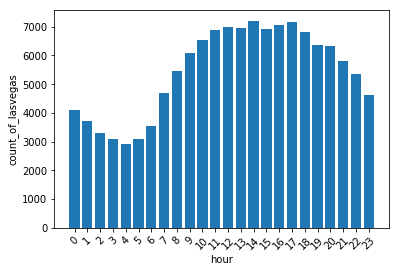

In [109]:
_.bar()

In [110]:
%%sql
select hour,count(*) as count_of_sanfrancisco
from incident_fact
join date
on incident_fact.date_key=date.date_key
group by hour
order by hour;

 * postgresql://student@/group19
24 rows affected.


hour,count_of_sanfrancisco
0,14064
1,12651
2,11606
3,9886
4,8711
5,8703
6,10551
7,13890
8,17476
9,20522


<BarContainer object of 24 artists>

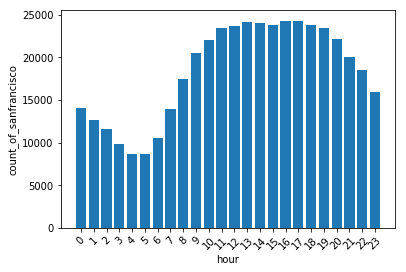

In [111]:
_.bar()

<b>FINDING:</b></br>
As the two bar graphs shown above, we notice that Las Vegas and San Francisco have the similar distribution of incidents in a day. The occurence of incidents in a day has no relationship with the type of the city, as Las Vegas is the city never sleeps which might have more incidents at night. The outputs demonstrate that both of the two cities have the similar distribution of incidents for every hour of a day.

#### 1.2 count of incident based on types

In [112]:
%%sql
select event_type,count(*) as count_of_lasvegas
from las_vegas
group by event_type
order by count(*) desc;

 * postgresql://student@/group19
4 rows affected.


event_type,count_of_lasvegas
Medical,117995
Public Need,7564
Fire,4042
Other,1439


In [113]:
%%sql
select type,count(*) as count_of_sanfrancisco
from incident_fact
join type
on incident_fact.type_key=type.type_key
group by type
order by count(*) desc
limit 10;

 * postgresql://student@/group19
10 rows affected.


type,count_of_sanfrancisco
Medical Incident,313780
Alarms,49359
Structure Fire,32024
Traffic Collision,16828
Citizen Assist / Service Call,6920
Other,6214
Outside Fire,5101
Gas Leak (Natural and LP Gases),2454
Water Rescue,2043
Electrical Hazard,1766


<b>FINDING:</b></br>
In Las Vegas, the Medical incidents occur the most (117995) and second is public need (7564). In San Francisco, the medical incident demonstrates the most. And the second is Alarms, the third is Structure Fire and the others make up the rest. Beyond that, we also find that San Francisco has more types of accidents and more incidents across different types. It's because San Francisco is a metropolitan and densely populated city, which is more likely.to capture incidents of different types.

### 2. Average time duration between Las Vegas and San Francisco

#### 2.1 average time duration based on the incident type

In [116]:
%%sql
select event_type as type_group,round(avg(time_duration),2) as avg_of_las_vegas
from las_vegas
group by event_type
order by avg(time_duration);

 * postgresql://student@/group19
4 rows affected.


type_group,avg_of_las_vegas
Public Need,153.77
Fire,155.18
Medical,162.84
Other,274.07


In [117]:
%%sql
select type, round(avg(time_duration),2) as avg_of_sanfrancisco
from incident_fact
join type
on incident_fact.type_key=type.type_key
group by type
order by avg(time_duration)
limit 5;

 * postgresql://student@/group19
5 rows affected.


type,avg_of_sanfrancisco
Alarms,404.01
Gas Leak (Natural and LP Gases),458.60
Outside Fire,460.02
Electrical Hazard,464.02
Explosion,474.03


<B>FINDINGS:</B> </BR>
We find that in San Francisco, the fire department reaches the scene most quickly for the alarms incident and the scecond is for the Gas Leak (Natural and LP Gases) incident. On the other hand, in Las Vegas, for dealing with the public need incidents, the fire department took the least time to reach the scene. Overall, the average time duration of Las Vegas accross all the types of incidents is less than that of San Francisco, which means the fire department seemes more efficient. But through our further analysis, we find that the terrible traffic in San Francisco might influence the fire department's efficiency.

#### 2.2 average time duration based on hour of a day

The most efficient hour of a day in Las Vegas and San Francisco

In [5]:
%%sql
select hour,round(avg(time_duration),2) as avg_of_las_vegas
from las_vegas
group by hour
order by avg(time_duration)
limit 10;

 * postgresql://student@/group19
10 rows affected.


hour,avg_of_las_vegas
10,135.55
7,135.83
9,142.19
5,142.89
8,145.14
13,147.32
11,151.37
12,152.73
18,156.51
4,157.04


In [126]:
%%sql
select hour,round(avg(time_duration),2) as avg_of_sanfrancisco
from incident_fact
join date
on incident_fact.date_key=date.date_key
group by hour
order by avg(time_duration)
limit 10;

 * postgresql://student@/group19
10 rows affected.


hour,count,avg_of_sanfrancisco
22,18515,527.60
21,20047,529.50
20,22131,541.19
19,23474,545.71
0,14064,547.47
3,9886,547.88
1,12651,549.87
2,11606,553.49
23,15898,556.83
12,23734,561.95


The least efficient hour of day in Las Vegas and San Francisco

In [7]:
%%sql
select hour,round(avg(time_duration),2) as avg_of_las_vegas
from las_vegas
group by hour
order by avg(time_duration) desc
limit 9;

 * postgresql://student@/group19
9 rows affected.


hour,avg_of_las_vegas
20,195.16
22,193.16
21,190.58
19,184.19
23,181.60
17,180.86
1,178.10
14,171.61
0,168.04


In [6]:
%%sql
select hour,round(avg(time_duration),2) as avg_of_sanfrancisco
from incident_fact
join date
on incident_fact.date_key=date.date_key
group by hour
order by avg(time_duration) desc
limit 9;

 * postgresql://student@/group19
9 rows affected.


hour,avg_of_sanfrancisco
7,610.76
14,606.56
17,599.61
8,598.15
5,596.30
16,589.90
6,588.25
4,583.70
9,582.42


<B>FINDINGS:</B></BR>
We compared the average time duration for every hour in Las Vegas with that in San Francisco.  From the outputs, we find that in Las Vegas, the least average duration happens from 8am to 4pm in Las Vegas (which is off-peak time) while the the fire departement took the most time to reach the scene during 5 pm to 1 am. From further analysis, this is quite similar to the characteristics of Las Vegas that never sleeps and whose rush hour is after 4 pm. Especially after 4pm, more people around and more vehicles on the street might cause the heavy traffic. Thus the busy traffic situation and densely populated area at night might result in the delay of fire department's arrival while the light traffic and few people at daytime may not cause the delay. On the other hand, in San Francisco, the least average duration happens from 7pm to 1 am in San Francisco, which avoids the rush hour. Instead, the largest average duration have two peaking time slots which are 5:00 am to 9:00 am, and 14:00 pm to 18:00 pm.  It might be relate with the rush hour in San Francisco so that the traffic situation causes the delay of arrival. To sum up, for the specific hour of a day, the average response time differs in the city due to its traffic situation and road condition. 

## PART 5 - Major Findings and Conclusions 

<b>THEME 1 - hour:</b></br>
- In a certain hour, total number of incidents occured seem not to be affected by the type of the incidents. In every hour of day, the medical incident occurs the most.
- There are less number of incidents at night time, and most incidents called in in day time.
- The average duration of the incident have two peaking time slots which  is very similar to standard rush hours in San Francisco. In regards, it may apply that the average response time is related to the traffic situation of the city. 

<b>THEME 2 - location:</b></br>
- Among all neighbors, Tenderloin, South of Market, and Mission are the top three neighborhoods with most life-threatening incidents. Thus, the fire department may relocate their police resources more in those neighborhoods.
- Among all neighbots, Treasure Island got 45% (high-level) of life-threatening calls but the longest average time-duration (slowest), thus they may need to improve their efficiencies.

<b>THEME 3 - type:</b></br>
- Among all types of incidents, Medical incident occurs the most. 
- For incident type of train, suspicious package and hazmat, the fire department may need to improve their efficiency and shorten the arrival time. 
- Through learning from the most efficient unit for different types of incident, other units could try to improve their efficiency for specific types of incidents.

<b>THEME 4 - priority changes:</b></br> 
- For most call types, the original priority setting are correct,and few changes occured. 
- Among all call types, Industrial Accidents has over 60% priority changes, and Mutual Aid / Assist Outside Agency has around 20% prioirity change from emergent to non-emergent level. Thus, the department need an urgent reconsideration of original priority level for these two call types to prevent waste of social resources.

<B>BONUS:</b></br>
We compared the count of incidents and average duration in San Francisco and Las Vegas by incident type and time. The findings of our bonus part might strengthen the conclusions we get from the part 3. The conclusions from the Bonus part are given below.
- Both city have the similar distribution pattern of incidents occurence. Obviously, there are less number of incidents from 12:00 AM to 8:00 AM which is night time, and most incidents in day time from 9:00 AM to 11:00PM.
- The medical incidents occur the most in both cities, which should arouse the attention of fire department. 
- Las vegas has less average response time than San Francisco, and it may be due to better traffic situation and road condition. The average response duration could differ from the rush hour and off-peak time, the differences shown in two cities could be related to the different rush hour that the sleepless city Las Vegas than San Francisco has.Thus, the rush hour might also delay the police arriving time.

## Attestation:

Contribution of every member
- Yoo na cha: Part 1 & Part 3 (theme 1), organize & format the ipython notebook 
- Qufang shu: Part 2 & Part 3 (theme 4), slides
- Xuelu Zhang: Part 2 & Part 3 (theme 3) & Bonus part
- Jamie Pan: Part 3(theme 2) & all tableau visualization, organize & format the ipython notebook 